<a href="https://colab.research.google.com/github/Abdul-Haseeb-boonig/NLP-Final/blob/main/2020008_NLP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()


import re
import string 

from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
from collections import Counter
from nltk.util import ngrams

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv('tweets.csv', encoding='utf8')
df.tail(2)

user_name                                               text  \
3412809           Devang  Was just wondering is there any difference bet...   
3412810  Norman Meuschke  #ChatGPT and similar #LLM pose a challenge to ...   

              user_location  \
3412809       United States   
3412810  Wuppertal, Germany   

                                          user_description  \
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

        user_favourites user_verified                       date  \
3412809             307         False  2022-12-05 17:08:44+00:00   
3412810             451         False  2022-12-05 17:08:20+00:00   

                    hashtags               source  
3412809  ['ChatGPT', 'GPT3']  Twitter for Android  
3412810   ['ChatGPT', 'LLM']      Twitter Web App

In [7]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   

In [8]:
stemmer = SnowballStemmer('english')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

In [20]:
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

  0%|          | 0/3412811 [00:00<?, ?it/s]

In [22]:
words = df["clean_text"].values
words

array(['gpt free clickbait qolaba studio chatbot power chatgpt offer chatgptplus free use along aiart generat allow click nft mint make aiartwork nfts openai openaichatgpt chatgpt',
       'ai enthusiast',
       'chatgpt think crypto coin explod year yahoo financ chatgpt ai openai https tcotfoduqndz',
       ...,
       'russel vs chatgpt also funni take long time answer chatgpt https tcoykrfrvct',
       'wonder differ jasper chatgpt gpt chatgpt gpt',
       'chatgpt similar llm pose challeng academ integr jan wahl explain current research present emnlp later week make us optimist challeng met https tcomeesdew'],
      dtype=object)

In [23]:
ls = []

for i in words:
    ls.append(str(i))

In [24]:
ls[:5]

['gpt free clickbait qolaba studio chatbot power chatgpt offer chatgptplus free use along aiart generat allow click nft mint make aiartwork nfts openai openaichatgpt chatgpt',
 'ai enthusiast',
 'chatgpt think crypto coin explod year yahoo financ chatgpt ai openai https tcotfoduqndz',
 'new jwvanc post startup includ vcinityinc st startup challeng thx chatgpt base answer macroeconom pressur vc fund track record manag team amp growth potenti market sector https tcojxgamjh',
 'get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa']

In [34]:
strings=str(words)

In [39]:
n_gram = 2
bi=Counter(ngrams(strings.split(), n_gram)).most_common(10)
bi

[(("['gpt", 'free'), 1),
 (('free', 'clickbait'), 1),
 (('clickbait', 'qolaba'), 1),
 (('qolaba', 'studio'), 1),
 (('studio', 'chatbot'), 1),
 (('chatbot', 'power'), 1),
 (('power', 'chatgpt'), 1),
 (('chatgpt', 'offer'), 1),
 (('offer', 'chatgptplus'), 1),
 (('chatgptplus', 'free'), 1)]

<BarContainer object of 10 artists>

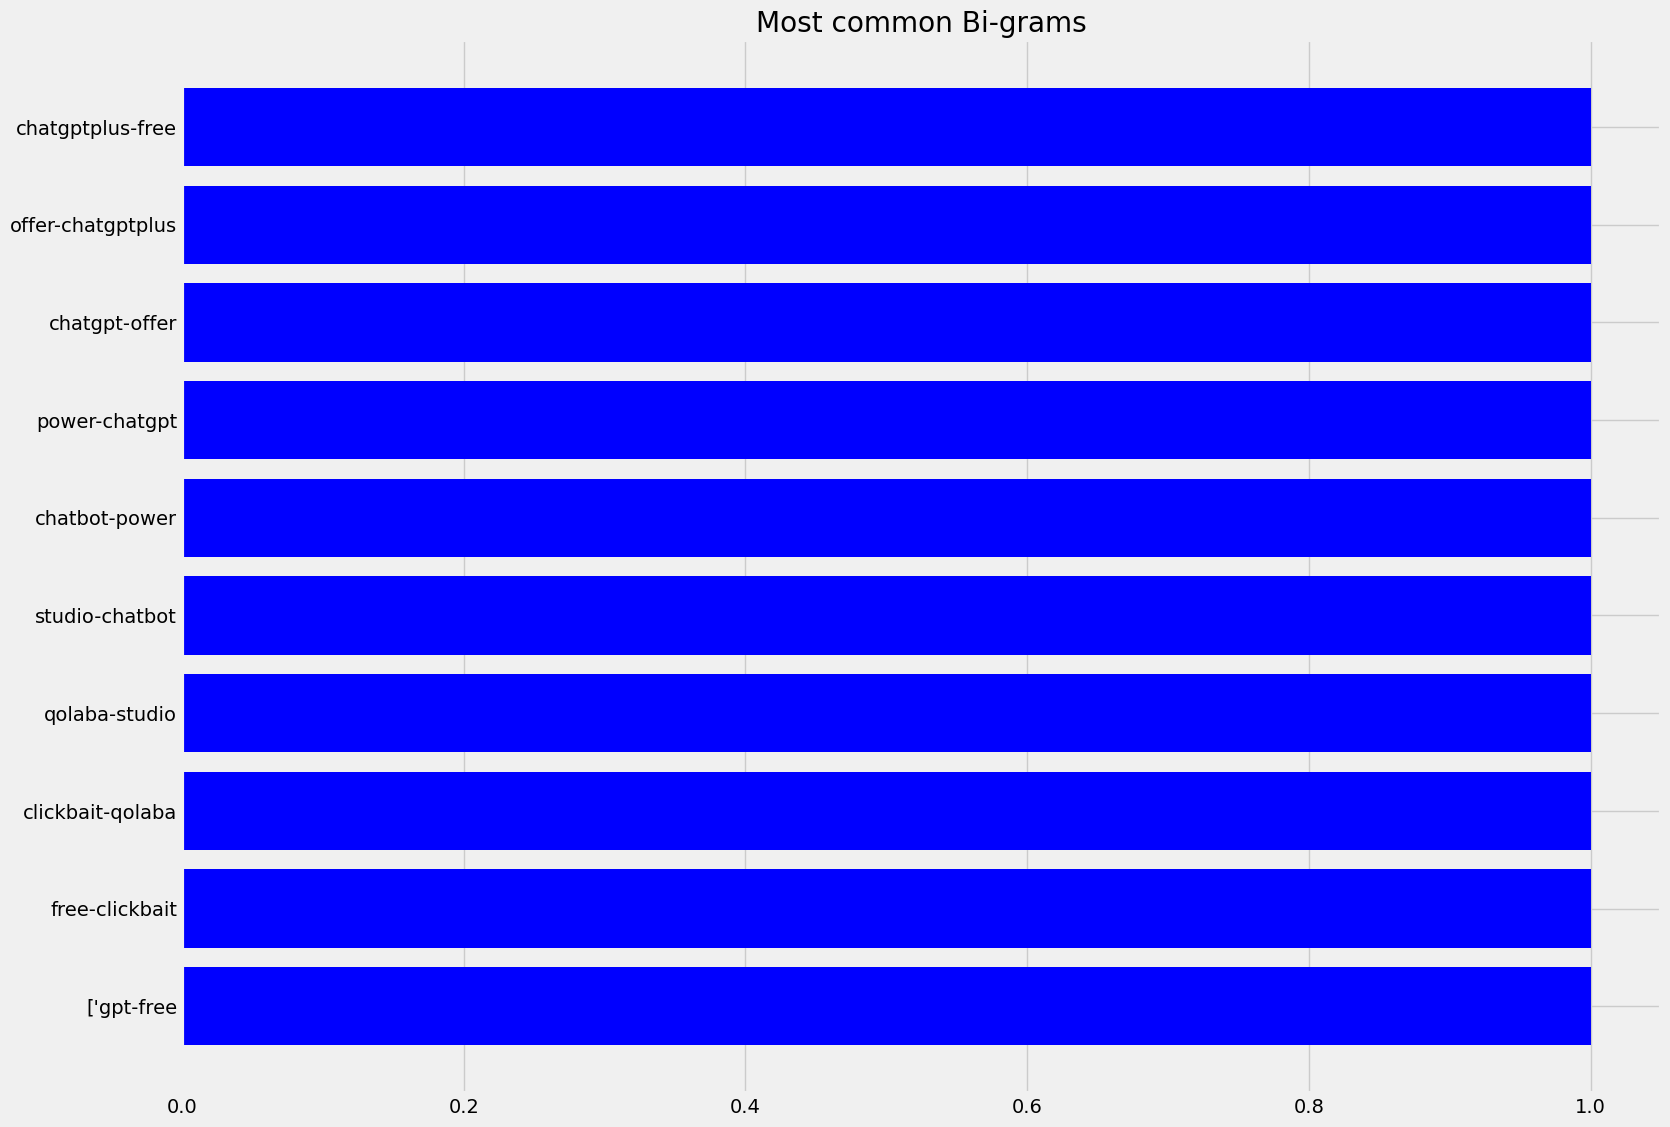

In [47]:
wrds = ['-'.join(x) for x, c in bi]

# get the counts
wdth = [c for x, c in bi]
plt.title('Most common Bi-grams')
plt.barh(wrds, wdth, color='blue')

In [44]:
n_gram = 3
tri=Counter(ngrams(strings.split(), n_gram)).most_common(10)
tri

[(("['gpt", 'free', 'clickbait'), 1),
 (('free', 'clickbait', 'qolaba'), 1),
 (('clickbait', 'qolaba', 'studio'), 1),
 (('qolaba', 'studio', 'chatbot'), 1),
 (('studio', 'chatbot', 'power'), 1),
 (('chatbot', 'power', 'chatgpt'), 1),
 (('power', 'chatgpt', 'offer'), 1),
 (('chatgpt', 'offer', 'chatgptplus'), 1),
 (('offer', 'chatgptplus', 'free'), 1),
 (('chatgptplus', 'free', 'use'), 1)]

<BarContainer object of 10 artists>

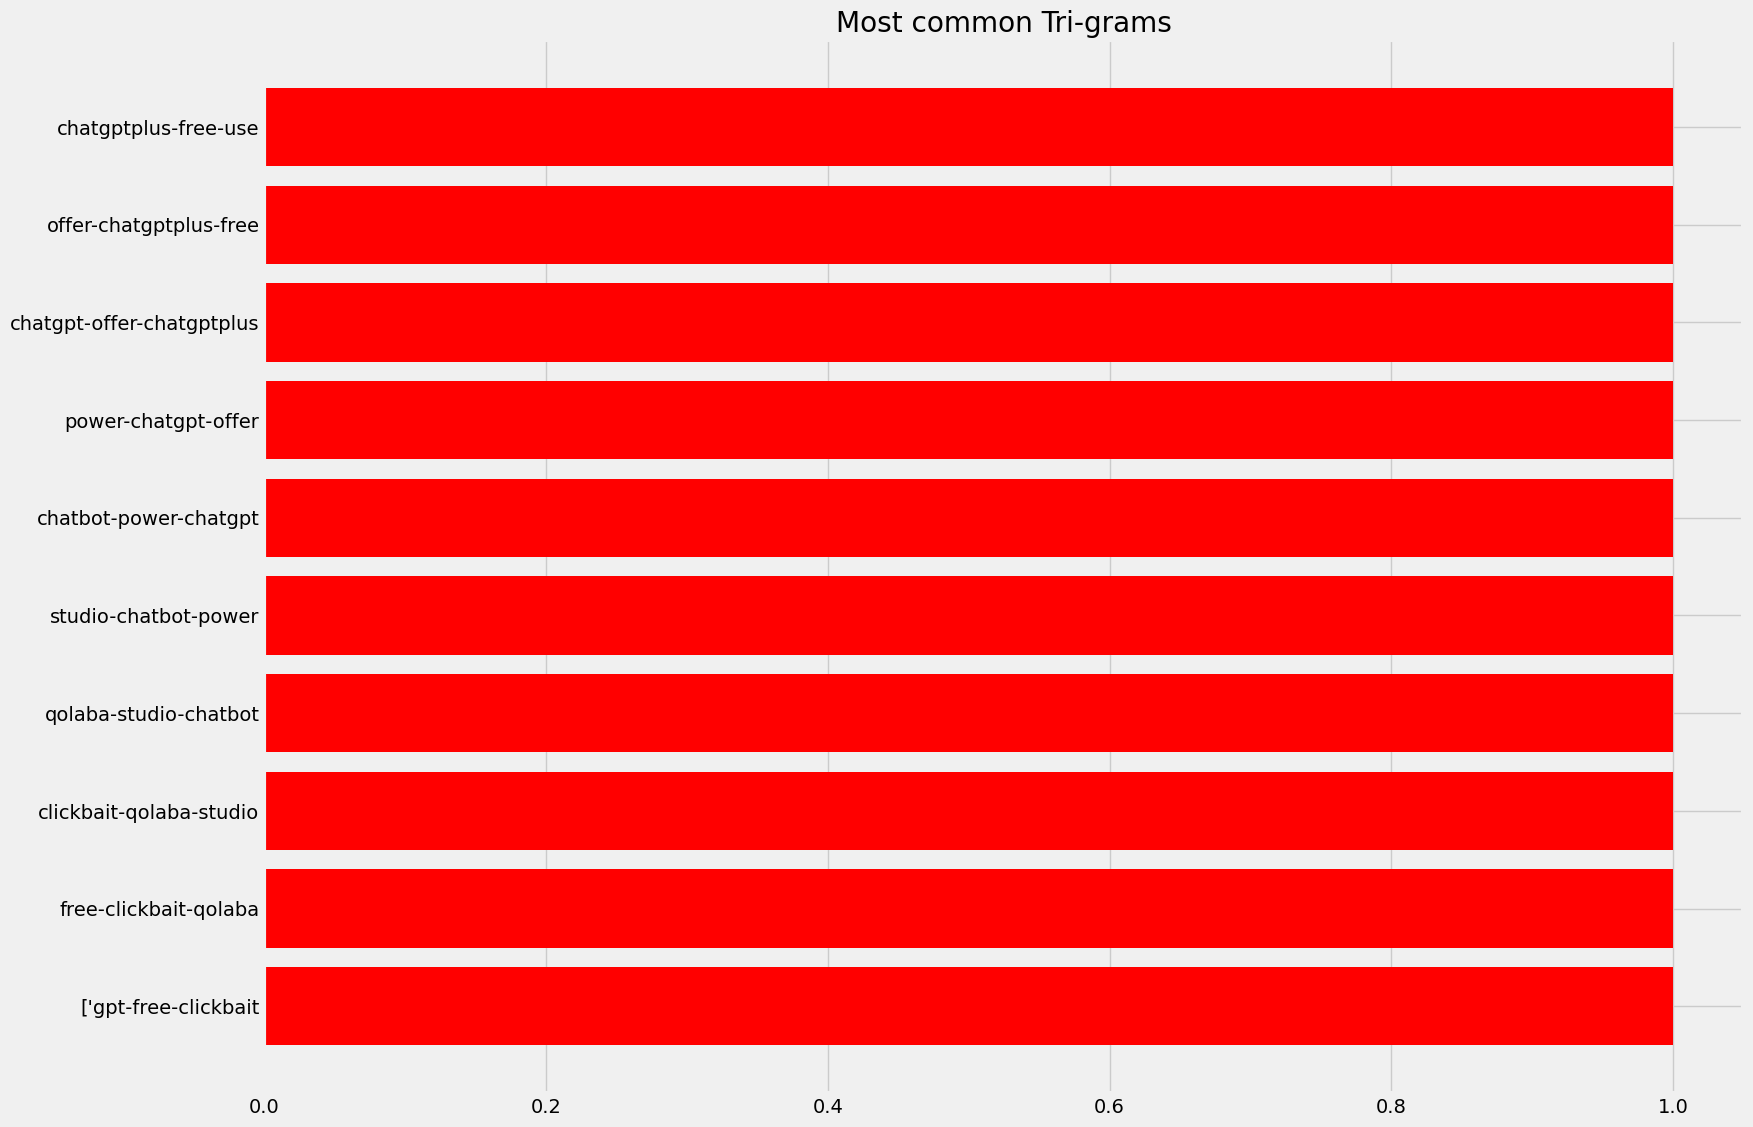

In [48]:
wrds = ['-'.join(x) for x, c in tri]

# get the counts
wdth = [c for x, c in bi]
plt.title("Most common Tri-grams")
plt.barh(wrds, wdth, color='red')

(-0.5, 1599.5, 799.5, -0.5)

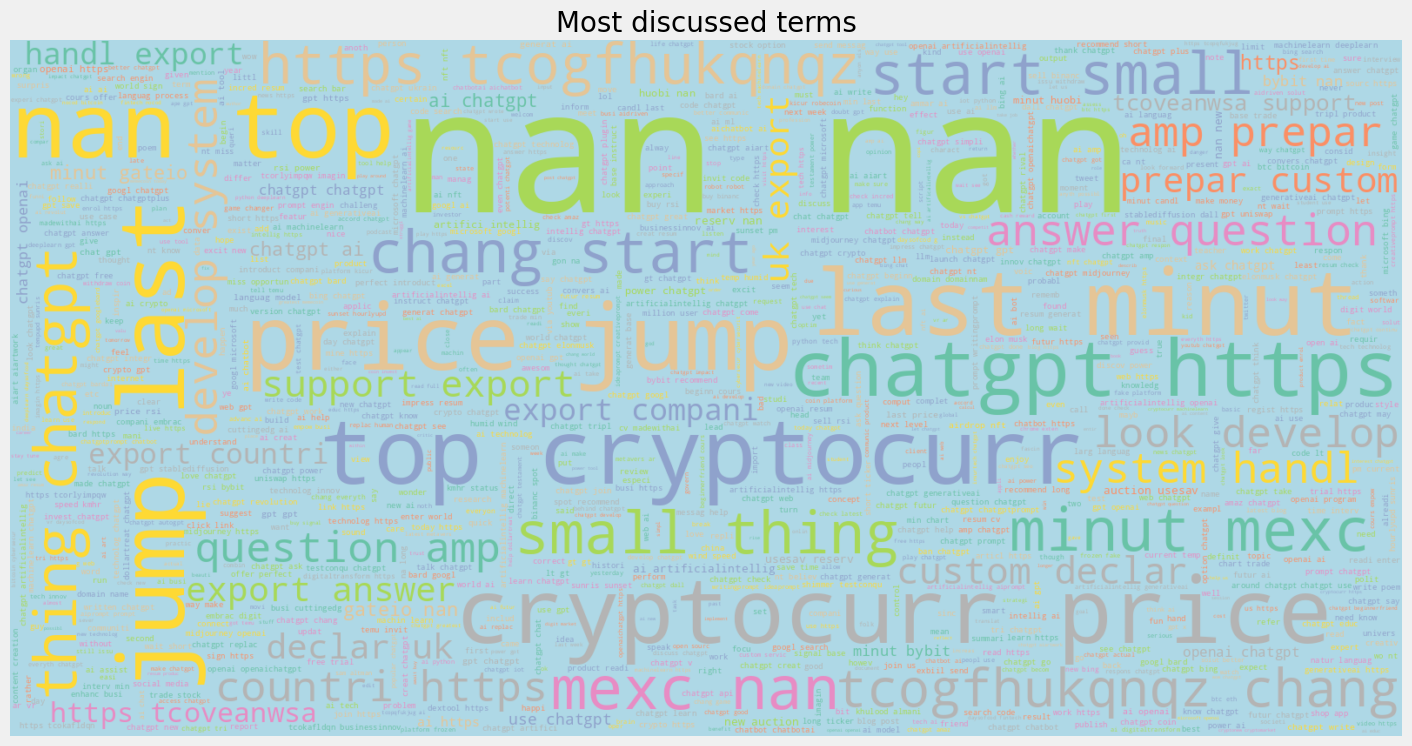

In [46]:
# The wordcloud 
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="lightblue", colormap='Set2', max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Set2' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')